In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact

In [2]:
# manual seed for reproducibility
torch.manual_seed(855413)
np.random.seed(9991)

In [3]:
transform = transforms.Compose(
    [transforms.PILToTensor(),
     transforms.ConvertImageDtype(torch.float)
    ])

# Creating Sinusoidal Grating Dataset

In [4]:
from SineGratesDataset import SineGrates

In [5]:
cat_scheme = 'ii'

In [6]:
rb_params = {
    'a_means':[[30,50],[50,70]],
    'b_means':[[50,30],[70,50]],
    'a_covariances':[[[10,0],[0,150]],[[150,0],[0,10]]],
    'b_covariances':[[[10,0],[0,150]],[[150,0],[0,10]]]
}

ii_params = {
    'a_means':[40,50],
    'b_means':[60,50],
    'a_covariances':[[10,0],[0,280]],
    'b_covariances':[[10,0],[0,280]]
}

if cat_scheme == 'rb':
    dist_params = rb_params
elif cat_scheme == 'ii':
    dist_params = ii_params

In [7]:
trainset = SineGrates(cat_scheme=cat_scheme, dist_params=dist_params, length=1000, transform=transform)
#testset = trainset
testset = SineGrates(cat_scheme=cat_scheme, dist_params=dist_params, length=10, transform=transform)

## Visualize and modify the distribution parameters

The dataset will automatically reflect these manual changes when generating the data.

In [8]:
def modify_dist_params_ii(**kwargs):
    new_ii_params = {
        'a_means':[kwargs['a_means_x'], kwargs['a_means_y']],
        'b_means':[kwargs['b_means_x'], kwargs['b_means_y']],
        'a_covariances':[[kwargs['a_cov_x'],0],[0,kwargs['a_cov_y']]],
        'b_covariances':[[kwargs['b_cov_x'],0],[0,kwargs['b_cov_y']]]
    }
    trainset.set_dist_params(new_ii_params)
    testset.set_dist_params(new_ii_params)
    plt.show(trainset.plot_final())
    plt.show(testset.plot_final())

In [9]:
mean_range = 40
cov_range = 100

In [12]:
interact(modify_dist_params_ii, 
         a_means_x = (40-mean_range,40+mean_range,1),
         a_means_y = (50-mean_range,50+mean_range,1),
         b_means_x = (60-mean_range,60+mean_range,1),
         b_means_y = (50-mean_range,50+mean_range,1),
         a_cov_x = (max(0,10-cov_range), 10+cov_range,1),
         a_cov_y = (280-cov_range, 280+cov_range, 1),
         b_cov_x = (max(0,10-cov_range),10+cov_range,1),
         b_cov_y = (280-cov_range, 280+cov_range, 1),
        )

interactive(children=(IntSlider(value=40, description='a_means_x', max=80), IntSlider(value=50, description='a…

<function __main__.modify_dist_params_ii(**kwargs)>

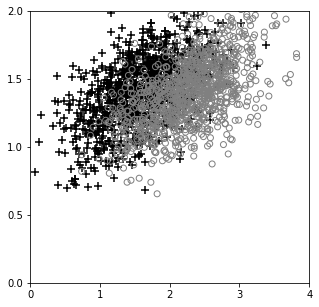

<Figure size 432x288 with 0 Axes>

In [13]:
plt.show(trainset.plot_final())

In [14]:
label, image = next(iter(trainset))

In [15]:
image[0,100]

tensor([0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020,
        0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020,
        0.5020, 0.5020, 0.5020, 0.4941, 0.4510, 0.3255, 0.1412, 0.0314, 0.0039,
        0.0078, 0.0275, 0.0627, 0.1098, 0.1686, 0.2353, 0.3137, 0.3922, 0.4784,
        0.5647, 0.6471, 0.7255, 0.7961, 0.8627, 0.9137, 0.9569, 0.9843, 0.9961,
        0.9961, 0.9804, 0.9529, 0.9098, 0.8549, 0.7922, 0.7176, 0.6392, 0.5529,
        0.4706, 0.3843, 0.3059, 0.2314, 0.1608, 0.1059, 0.0588, 0.0275, 0.0078,
        0.0039, 0.0118, 0.0353, 0.0745, 0.1216, 0.1843, 0.2549, 0.3294, 0.4118,
        0.4980, 0.5843, 0.6667, 0.7412, 0.8118, 0.8745, 0.9255, 0.9608, 0.9882,
        0.9961, 0.9922, 0.9765, 0.9412, 0.8980, 0.8392, 0.7725, 0.6980, 0.6196,
        0.5333, 0.4510, 0.3647, 0.2863, 0.2118, 0.1490, 0.0941, 0.0510, 0.0196,
        0.0039, 0.0039, 0.0157, 0.0431, 0.0824, 0.1373, 0.2000, 0.2706, 0.3490,
        0.4314, 0.5176, 0.6000, 0.6824, 

In [16]:
type(image)

torch.Tensor

# Setting up Data Pipeline

In [17]:
batch_size = 4

In [18]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=12)

In [19]:
classes = ['Condition A', 'Condition B']

In [20]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #plt.imshow(npimg)
    plt.show()

dataiter = iter(trainloader)
labels, images = dataiter.next()

In [21]:
images.shape

torch.Size([4, 1, 256, 256])

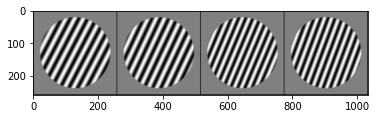

Condition B Condition B Condition B Condition B


In [22]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [23]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=12)
dataiter = iter(testloader)
labels, images = dataiter.next()

images.shape

torch.Size([4, 1, 256, 256])

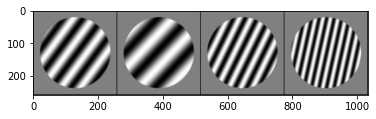

GroundTruth:  Condition A Condition A Condition A Condition A


In [24]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Define a Neural Network

In [25]:
class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 2, dropout: float = 0.5) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 2, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(2, 2, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(2, 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(2, 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(2, 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        #self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            #nn.Dropout(p=dropout),
            #nn.Linear(128 * 6 * 6, 16),
            
            #nn.Linear(2 * 7 * 7, 32),
            nn.Linear(2 * 7 * 7, num_classes)
            
            #nn.ReLU(inplace=True),
            #nn.Dropout(p=dropout),
            #nn.Linear(4096, 4096),
            #nn.ReLU(inplace=True),
            #nn.Linear(32, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        #print(x.shape)
        #x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [26]:
net = AlexNet()
net = net.cuda()

In [27]:
from torchsummary import summary
summary(net, (1,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 63, 63]             244
              ReLU-2            [-1, 2, 63, 63]               0
         MaxPool2d-3            [-1, 2, 31, 31]               0
            Conv2d-4            [-1, 2, 31, 31]             102
              ReLU-5            [-1, 2, 31, 31]               0
         MaxPool2d-6            [-1, 2, 15, 15]               0
            Conv2d-7            [-1, 2, 15, 15]              38
              ReLU-8            [-1, 2, 15, 15]               0
            Conv2d-9            [-1, 2, 15, 15]              38
             ReLU-10            [-1, 2, 15, 15]               0
           Conv2d-11            [-1, 2, 15, 15]              38
             ReLU-12            [-1, 2, 15, 15]               0
        MaxPool2d-13              [-1, 2, 7, 7]               0
           Linear-14                   

# Define Loss Function and Optimizer

In [28]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [ ]:
for epoch in range(300):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        labels, images = data
        images = 2 * (images - 0.5002) # [0-1] to [-1,1]
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, loss: {running_loss:.3f}")
    running_loss = 0.0
    with torch.no_grad():
        correct = 0
        total = 0
        for i,data in enumerate(testloader,0):
            labels, images = data
            images = 2 * (images - 0.5002)
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)
            softmax_labels = F.log_softmax(outputs, dim=1)
            preds_classes = torch.argmax(softmax_labels, axis=-1)
            correct += int(torch.sum(preds_classes.cpu() == labels.cpu()))
            total += batch_size
        print(f"\tTest Accuracy: {100*correct/total:.3f} %")


Epoch 1, loss: 130.933
	Test Accuracy: 70.000 %
Epoch 2, loss: 32.641
	Test Accuracy: 70.000 %
Epoch 3, loss: 24.144
	Test Accuracy: 75.000 %
Epoch 4, loss: 25.542
	Test Accuracy: 80.000 %
Epoch 5, loss: 19.913
	Test Accuracy: 85.000 %
Epoch 6, loss: 25.007
	Test Accuracy: 75.000 %
Epoch 7, loss: 18.493
	Test Accuracy: 80.000 %
Epoch 8, loss: 18.291
	Test Accuracy: 90.000 %
Epoch 9, loss: 19.570
	Test Accuracy: 80.000 %
Epoch 10, loss: 17.228
	Test Accuracy: 75.000 %
Epoch 11, loss: 15.165
	Test Accuracy: 80.000 %
Epoch 12, loss: 16.342
	Test Accuracy: 75.000 %
Epoch 13, loss: 18.423
	Test Accuracy: 80.000 %
Epoch 14, loss: 18.671
	Test Accuracy: 80.000 %
Epoch 15, loss: 15.386
	Test Accuracy: 80.000 %
Epoch 16, loss: 15.951
	Test Accuracy: 80.000 %
Epoch 17, loss: 18.499
	Test Accuracy: 80.000 %
Epoch 18, loss: 16.290
	Test Accuracy: 80.000 %
Epoch 19, loss: 16.174
	Test Accuracy: 80.000 %
Epoch 20, loss: 16.251
	Test Accuracy: 80.000 %
Epoch 21, loss: 12.654
	Test Accuracy: 80.000 %


No circular mask: Max accuracy 89.286% reached at Epoch 45
With circular mask: Max accuracy 89.286% reached at Epoch Epoch 51

Hilarious and shocking: Making the training set tiny (10) and overfittinng the training set returned the best model. Loss: 0.0, Test accuracy: 95.5%. (ii condition)

Same for 'rb' condition, but even higher accuracy: 97.0%

+ Adam lr=3e-5

This network (AlexNet-like) doesn't overfit the dataset beyond 80 training set, although maximum accuracy is reached at 160. (100%). The exact number depends on the numpy random seed (for dataset distribution).

I kept trying to weaken/lighten the neural network,
going so far as to replace Conv layers with AvgPool.
When it got stuck, I changed the seed.

Generally, lighter networks started tended to take longer to train.

ii
```
Epoch 1, loss: 85.18336582183838
Epoch 2, loss: 34.31419908697717
Epoch 3, loss: 20.531744883628562
Epoch 4, loss: 10.242627459112555
Epoch 5, loss: 8.574068777030334
Epoch 6, loss: 6.0638184630115575
Epoch 7, loss: 6.023264018360351
Epoch 8, loss: 5.1939516832790105
Epoch 9, loss: 5.4007573618218885
Epoch 10, loss: 5.164374641648465
Epoch 11, loss: 3.511080036558269
Epoch 12, loss: 4.276801145038917
Epoch 13, loss: 3.6609255538830894
Epoch 14, loss: 4.6994722907015785
Epoch 15, loss: 4.765986231519491
Epoch 16, loss: 4.714876491774248
Epoch 17, loss: 4.739646985006402
Epoch 18, loss: 3.8179756865556556
Epoch 19, loss: 3.849432604794856
Epoch 20, loss: 4.121982953985935
Epoch 21, loss: 3.3283890375539613
Epoch 22, loss: 5.158853088214528
Epoch 23, loss: 3.3509279994996177
Epoch 24, loss: 4.925103814290196
Epoch 25, loss: 3.597546736024924
Epoch 26, loss: 3.4156451058997845
Epoch 27, loss: 3.92656532269757
Epoch 28, loss: 3.454477835464786
Epoch 29, loss: 4.126161962380138
```

rb
```
Epoch 1, loss: 81.22609773278236
Epoch 2, loss: 14.698232750408351
Epoch 3, loss: 7.9504072612617165
Epoch 4, loss: 5.531502670957707
Epoch 5, loss: 2.597533548818319
Epoch 6, loss: 3.287875532914768
Epoch 7, loss: 1.6578662709071068
Epoch 8, loss: 2.9465451682626735
Epoch 9, loss: 3.038850345830724
Epoch 10, loss: 1.9624634058345691
Epoch 11, loss: 2.759255254357413
Epoch 12, loss: 2.156060866313055
Epoch 13, loss: 2.234694680584653
Epoch 14, loss: 2.082504246973258
Epoch 15, loss: 2.892491750237241
Epoch 16, loss: 2.1645498814541497
Epoch 17, loss: 2.2291575001727324
Epoch 18, loss: 1.7113196223872364
Epoch 19, loss: 1.599599110239069
Epoch 20, loss: 1.6463019263683236
Epoch 21, loss: 1.765304080741771
Epoch 22, loss: 2.0521400574434665
Epoch 23, loss: 2.256082821975724
Epoch 24, loss: 2.027793706598459
Epoch 25, loss: 1.510054058764581
Epoch 26, loss: 1.9244091983491671
Epoch 27, loss: 1.6030073140500463
Epoch 28, loss: 1.3176469673635438
Epoch 29, loss: 1.6648579663578857
```